# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [8]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from ipywidgets import interactive
import ipywidgets as widgets
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Libraries
data = pd.read_csv('/Users/ayubpathan/Desktop/ironhack/Week5/lab-linear-regression-correlation/data/absences.csv')

In [10]:
data.head()

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

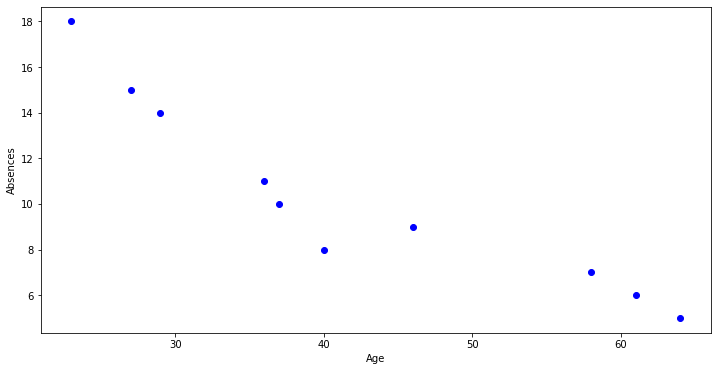

In [17]:
fig , ax = plt.subplots(figsize=(12,6))

ax.scatter(data.Age, data.Absences, color='blue')
plt.xlabel('Age')
plt.ylabel('Absences');

In [58]:
# your comments here:
"We see high negative gradient/correlation between age and absences as age increases absences decreases"

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [9]:
#your code here
# regression intercept slope formula is b0 = y -b1*x
# however, regression equation can be written as:
# y’ = b0 + b1x 
# where b0 is the y-intercept and b1x is the slope.

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [26]:
x = data['Age']
y = data['Absences']
b = ( np.mean(x*y) - (np.mean(x)*np.mean(y)) ) / ( np.mean(x*x) - np.mean(x)**2 )
# Intercept
a = np.mean(y) - np.mean(x)*b

print("The slope of the regression is: {:.2f}".format(b))
print("The intercept of the regression is: {:.2f}".format(a))

The slope of the regression is: -0.27
The intercept of the regression is: 21.59


'Below plot shows there is good fit of regression'

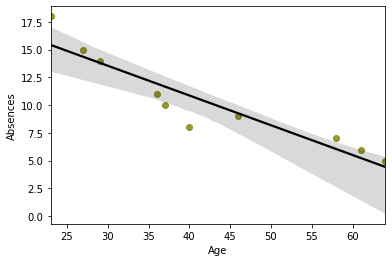

In [29]:
sns.regplot(x=data['Age'],y=data['Absences'], data=data, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

"Below plot shows there is good fit of regression"

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [69]:
# calculating covariance:
# calculate difference of mean from each variable:
# n= sample size
# a = x - mean(x)
# b = y - mean(y)
# product_ab: a*b
# sum_of_all_products = sum(a*b)
# covar = sum_of_all_products / (n-1)

# calculating correlation: 
# mean_a = mean(x)
# std_a = std(x)

# mean_b = mean(y)
# std(b) = std(b)

# denominator = (n-1)**std_a*std_b

# sum_of_xy_products = sum(all(x*y))

# numerator = sum_of_xy_products - (n*mean_a*mean_b)

# corr = numerator /denominator


#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [71]:
#covariance:
x = data['Age']
y = data['Absences']

x_mean = data['Age'].mean()
y_mean = data['Absences'].mean()

std_x = data['Age'].std()
std_y = data['Absences'].std()

a = x-x_mean
b = y-y_mean
n = len(data['Age'])

product = a*b
sum_product = product.sum()

covar = sum_product/(n-1)
print("Covariance", covar)

#correlation:

sum_all = x*y
sum_all 
all_sum = sum_all.sum()
all_sum

denominator = (n-1)*std_x*std_y
numerator = all_sum - (n*x_mean*y_mean)

corr = denominator / numerator

print("Correlation", corr)


Covariance -57.699999999999996
Correlation -1.0723361401548994


#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [74]:
# your comments here
print("From above result of correlation coefficient, it is clear that correlation coefficient is less than 0 and hence we can conclude Age and Absences are negatively correlated. However, it cannot be said clearly that age is an indiacator for absenteism.")

From above result of correlation coefficient, it is clear that correlation coefficient is less than 0 and hence we can conclude Age and Absences are negatively correlated. However, it cannot be said clearly that age is an indiacator for absenteism.


## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [38]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [77]:
# your code here
x=ironbeers_df['X']
y=ironbeers_df['Y']

x_mean = ironbeers_df['X'].mean()
y_mean = ironbeers_df['Y'].mean()

std_x = ironbeers_df['X'].std()
std_y = ironbeers_df['Y'].std()

a = x-x_mean
b = y-y_mean
n = len(x)

product = a*b
sum_product = product.sum()

covar = sum_product/(n-1)

#correlation:

sum_all = x*y
sum_all 
all_sum = sum_all.sum()
all_sum

denominator = (n-1)*std_x*std_y
numerator = all_sum - (n*x_mean*y_mean)

corr = denominator / numerator


print("Covariance", covar)
print("Correlation", corr)


Covariance 12.0
Correlation 1.023532631438318


In [78]:
# your comments here
print("From result, we can say tha X & Y are positively correlated!")

From result, we can say tha X & Y are positively correlated!


#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

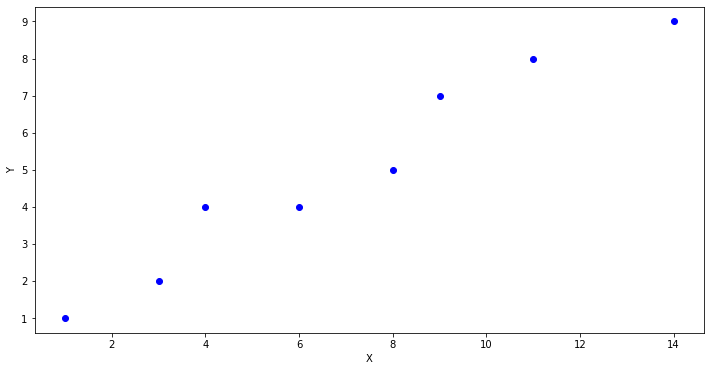

In [79]:
fig , ax = plt.subplots(figsize=(12,6))

ax.scatter(ironbeers_df.X, ironbeers_df.Y, color='blue')
plt.xlabel('X')
plt.ylabel('Y');

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [80]:
# your code here
x=ironbeers_df['X']
y=ironbeers_df['Y']
b = ( np.mean(x*y) - (np.mean(x)*np.mean(y)) ) / ( np.mean(x*x) - np.mean(x)**2 )
# Intercept
a = np.mean(y) - np.mean(x)*b

print("The slope of the regression is: {:.2f}".format(b))
print("The intercept of the regression is: {:.2f}".format(a))

The slope of the regression is: 0.64
The intercept of the regression is: 0.55


'Below plot shows there is good fit of regression'

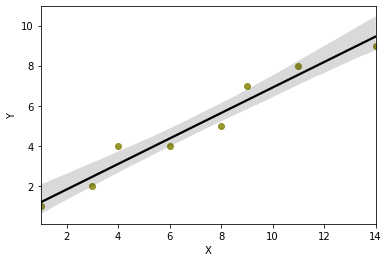

In [82]:
sns.regplot(x=ironbeers_df['X'],y=ironbeers_df['Y'], data=data, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

"Below plot shows there is good fit of regression"

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [84]:
# your comments here
print("I do not think it is a right conclusion to draw that people are not staying on Friday, because from the graph as well as numbers, there are sufficient numbers those are staying on Friday.")

I do not think it is a right conclusion to draw that people are not staying on Friday, because from the graph as well as numbers, there are sufficient numbers those are staying on Friday.


## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

,X,Y,expected_Y
0,1,1,1.181818
1,3,2,2.454545
2,4,4,3.090909
3,6,4,4.363636
4,8,5,5.636364
5,9,7,6.272727
6,11,8,7.545455
7,14,9,9.454545


R2_score: 0.9545454545454548


#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

,X,Y,expected_Y,error
0,1,1,1.181818,-0.181818
1,3,2,2.454545,-0.454545
2,4,4,3.090909,0.909091
3,6,4,4.363636,-0.363636
4,8,5,5.636364,-0.636364
5,9,7,6.272727,0.727273
6,11,8,7.545455,0.454545
7,14,9,9.454545,-0.454545


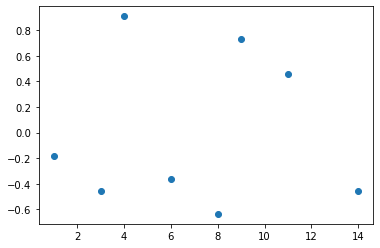

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# comment here

#### 4.- Remove the points with a high error (0.6 threshold) and recalculate the regression line.

In [49]:
# your code here 


,X,Y,expected_Y,error
0,1,1,1.181818,-0.181818
1,3,2,2.454545,-0.454545
2,6,4,4.363636,-0.363636
3,8,5,5.636364,-0.636364
4,11,8,7.545455,0.454545
5,14,9,9.454545,-0.454545


Plot before deleting higher error data points: 


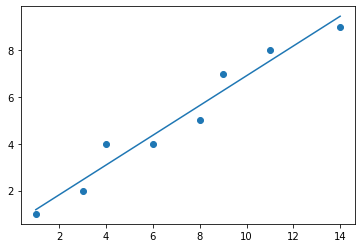

Plot after deleting higher error data points: 


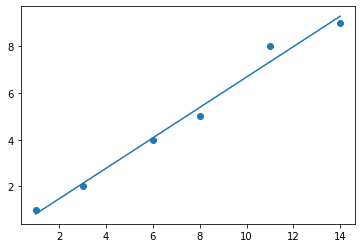

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here


Covariance and correlation before deleting higher error data points: 


(12.0, 0.9770084209183943)

Covariance and correlation after deleting higher error data points: 


(15.433333333333332, 0.9928560954470167)

In [87]:
# your comments here

